### Feb 15, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

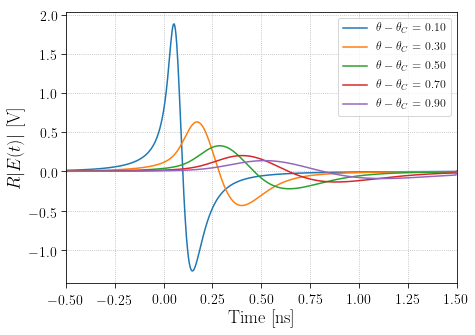

In [4]:
p = pyrex.Particle('nu_e', (0, 0, -2000), (0, 0, 1), 3e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
theta_ch = np.arccos(1/pyrex.ice.index(p.vertex[2]))
times = np.linspace(-0.5e-9, 1.5e-9, 601)
plt.figure(figsize=(7, 5))
for deltaAngle in np.arange(0.1, 1.1, 0.2):
    ask = pyrex.AskaryanSignal(times, p, viewing_angle=theta_ch-np.radians(deltaAngle))
    plt.plot(ask.times*1e9, ask.values/1E3, label = '$\\theta-\\theta_C = %0.2f$'%deltaAngle )
plt.grid(ls=':')
plt.xlim(-0.5, 1.5)
plt.xlabel("Time [ns]")
plt.ylabel("$R|E(t)|$ [V]")
# plt.title("$E_\\nu = 3\\times10^{18}$ eV")
plt.legend()
# for item in plt.gca().get_xticklabels()+plt.gca().get_yticklabels():
#     item.set_fontsize(12)
# plt.savefig('/Users/fasig/Desktop/pyrex_alvarez2011_field.pdf')
# plt.show()

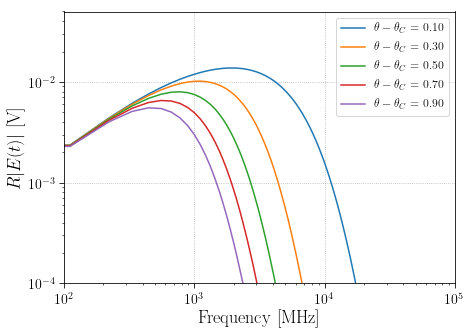

In [5]:
p = pyrex.Particle('nu_e', (0, 0, -2000), (0, 0, 1), 3e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
theta_ch = np.arccos(1/pyrex.ice.index(p.vertex[2]))
times = np.linspace(-3.5e-9, 5.5e-9, 601)
plt.figure(figsize=(7, 5))
for deltaAngle in np.arange(0.1, 1.1, 0.2):
    ask = pyrex.AskaryanSignal(times, p, viewing_angle=theta_ch-np.radians(deltaAngle))
    plt.plot(ask.frequencies/1E6, abs(ask.spectrum)/1E6, label = '$\\theta-\\theta_C = %0.2f$'%deltaAngle )
plt.grid(ls=':')
plt.xlim(1E2,1E5)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-4,5E-2)
plt.xlabel("Frequency [MHz]")
plt.ylabel("$R|E(t)|$ [V]")
# plt.title("$E_\\nu = 3\\times10^{18}$ eV")
plt.legend()


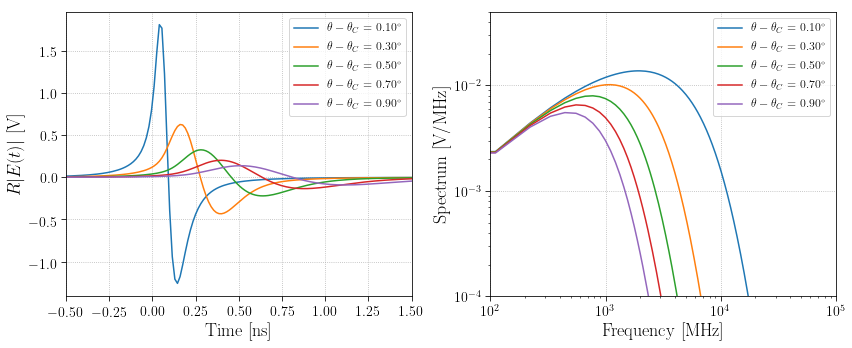

<Figure size 504x360 with 0 Axes>

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(12, 5))
p = pyrex.Particle('nu_e', (0, 0, -2000), (0, 0, 1), 3e9)
p.interaction.em_frac = 0
p.interaction.had_frac = 1
theta_ch = np.arccos(1/pyrex.ice.index(p.vertex[2]))
times = np.linspace(-3.5e-9, 5.5e-9, 601)
plt.figure(figsize=(7, 5))
for deltaAngle in np.arange(0.1, 1.1, 0.2):
    ask = pyrex.AskaryanSignal(times, p, viewing_angle=theta_ch-np.radians(deltaAngle))
    ax1.plot(ask.times*1e9, ask.values/1E3, label = '$\\theta-\\theta_C = %0.2f^\circ$'%deltaAngle )
ax1.grid(ls=':')
ax1.set_xlim(-0.5, 1.5)
ax1.set_xlabel("Time [ns]")
ax1.set_ylabel("$R|E(t)|$ [V]")
ax1.legend()

for deltaAngle in np.arange(0.1, 1.1, 0.2):
    ask = pyrex.AskaryanSignal(times, p, viewing_angle=theta_ch-np.radians(deltaAngle))
    ax2.plot(ask.frequencies/1E6, abs(ask.spectrum)/1E6, label = '$\\theta-\\theta_C = %0.2f^\circ$'%deltaAngle )
ax2.grid(ls=':')
ax2.set_xlim(1E2,1E5)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(1E-4,5E-2)
ax2.set_xlabel("Frequency [MHz]")
ax2.set_ylabel("Spectrum [V/MHz]")
# plt.title("$E_\\nu = 3\\times10^{18}$ eV")
ax2.legend()
fig.tight_layout()
fig.savefig("./Askaryan_Model.pdf")

In [6]:
np.degrees(theta_ch)

55.81978427538918